## –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º–∞

In [3]:
import optuna
import time
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

–î–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ —Ñ–∞–π–ª—ã *.ann.features.csv, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ —Å–æ–¥–µ—Ä–∂–∞—Ç —É–∂–µ —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —Ç–∞–º –µ—Å—Ç—å –∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –º–µ—Ç–∫–∏.
–û–±—ä–µ–¥–∏–Ω–∏–º –¥–∞–Ω–Ω—ã–µ –∏–∑ —Ñ–∞–π–ª–æ–≤:

In [4]:
import pandas as pd
import glob

# –ù–∞–π–¥–µ–º –≤—Å–µ –Ω—É–∂–Ω—ã–µ CSV-—Ñ–∞–π–ª—ã
file_paths = glob.glob("data/csh*.ann.features.csv")

# –ß–∏—Ç–∞–µ–º –∏ –æ–±—ä–µ–¥–∏–Ω—è–µ–º
df_list = [pd.read_csv(file) for file in file_paths]
df_full = pd.concat(df_list, ignore_index=True)

print("–î–∞–Ω–Ω—ã–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã.")
print("–§–æ—Ä–º–∞ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:", df_full.shape)
print("–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏:", df_full['activity'].unique())

–î–∞–Ω–Ω—ã–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã.
–§–æ—Ä–º–∞ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: (1854095, 37)
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏: ['Step_Out' 'Other_Activity' 'Toilet' 'Phone' 'Personal_Hygiene'
 'Leave_Home' 'Enter_Home' 'Relax' 'Sleep_Out_Of_Bed' 'Drink' 'Watch_TV'
 'Dress' 'Evening_Meds' 'Wake_Up' 'Read' 'Morning_Meds' 'Cook_Breakfast'
 'Eat_Breakfast' 'Bathe' 'Cook_Lunch' 'Eat_Lunch' 'Wash_Lunch_Dishes'
 'Go_To_Sleep' 'Sleep' 'Bed_Toilet_Transition' 'Wash_Breakfast_Dishes'
 'Work_At_Table' 'Groom' 'Cook' 'Eat' 'Cook_Dinner' 'Eat_Dinner'
 'Wash_Dinner_Dishes' 'Wash_Dishes' 'Entertain_Guests' 'Take_Medicine'
 'Work' 'Exercise' 'Work_On_Computer' 'Nap']


–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

In [5]:
X = df_full.drop(columns=['activity'])# –ø—Ä–∏–∑–Ω–∞–∫–∏
y = df_full['activity']# —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è


In [6]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_cols = X.select_dtypes(include='object').columns
print("–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", cat_cols.tolist())

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print(X.isnull().sum())

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: []
lastSensorEventHours        0
lastSensorEventSeconds      0
lastSensorDayOfWeek         0
windowDuration              0
timeSinceLastSensorEvent    0
prevDominantSensor1         0
prevDominantSensor2         0
lastSensorID                0
lastSensorLocation          0
lastMotionLocation          0
complexity                  0
activityChange              0
areaTransitions             0
numDistinctSensors          0
sensorCount-Bathroom        0
sensorCount-Bedroom         0
sensorCount-Chair           0
sensorCount-DiningRoom      0
sensorCount-Hall            0
sensorCount-Ignore          0
sensorCount-Kitchen         0
sensorCount-LivingRoom      0
sensorCount-Office          0
sensorCount-OutsideDoor     0
sensorCount-WorkArea        0
sensorElTime-Bathroom       0
sensorElTime-Bedroom        0
sensorElTime-Chair          0
sensorElTime-DiningRoom     0
sensorElTime-Hall           0
sensorElTime-Ignore         0
sensorElTime-Kitchen

–ï—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ñ—Ä–µ–π–º–≤–æ—Ä–∫–æ–≤ –¥–ª—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞, –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –º—ã —Ä–µ—à–∏–ª–∏ –≤—ã–±—Ä–∞—Ç—å XGBoost, —Ç–∞–∫ –∫–∞–∫ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –æ–Ω –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª–µ–Ω –∏ –¥–∞–µ—Ç —Ö–æ—Ä–æ—à–∏–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–û–ø–∏—à–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º:
1. –ú–æ–¥–µ–ª—å –≤–∏–¥–∏—Ç –¥–∞–Ω–Ω—ã–µ X_train (–≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞—Ç—á–∏–∫–æ–≤) –∏ y_train (–≤–∏–¥ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ –¥–æ–º–µ).
–°–Ω–∞—á–∞–ª–∞ –æ–Ω–∞ —Å—Ç—Ä–æ–∏—Ç –ø–µ—Ä–≤–æ–µ –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä–æ–µ –¥–µ–ª–∞–µ—Ç –Ω–∞—á–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è ‚Äî —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –Ω–µ—Ç–æ—á–Ω—ã–µ.
2. –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫
–ü–æ—Å–ª–µ –ø–µ—Ä–≤–æ–≥–æ –¥–µ—Ä–µ–≤–∞ XGBoost —Å—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏, –≤—ã—á–∏—Å–ª—è–µ—Ç –æ—à–∏–±–∫—É (–≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ—Ç–µ—Ä—å), –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ—à–∏–±–æ–∫ –æ–±—É—á–∞–µ—Ç –≤—Ç–æ—Ä–æ–µ –¥–µ—Ä–µ–≤–æ, –∫–æ—Ç–æ—Ä–æ–µ –±—É–¥–µ—Ç —Å—Ç–∞—Ä–∞—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –∏–º–µ–Ω–Ω–æ –æ—à–∏–±–∫–∏ –ø–µ—Ä–≤–æ–≥–æ –¥–µ—Ä–µ–≤–∞.
3. –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ
–ö–∞–∂–¥–æ–µ —Å–ª–µ–¥—É—é—â–µ–µ –¥–µ—Ä–µ–≤–æ –æ–±—É—á–∞–µ—Ç—Å—è –Ω–∞ –æ—à–∏–±–∫–∞—Ö –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –¥–µ—Ä–µ–≤—å–µ–≤, –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–ª—É—á—à–∞–µ—Ç –∏—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ, —Å –∫–∞–∂–¥—ã–º —à–∞–≥–æ–º "–∫–æ–º–∞–Ω–¥–∞ –¥–µ—Ä–µ–≤—å–µ–≤" —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —É–º–Ω–µ–µ.
4. –ò—Ç–æ–≥–æ–≤–∞—è –º–æ–¥–µ–ª—å
–í –∏—Ç–æ–≥–µ –º–æ–¥–µ–ª—å —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ —Å—É–º–º—ã –≤—Å–µ—Ö –¥–µ—Ä–µ–≤—å–µ–≤, –≥–¥–µ –∫–∞–∂–¥—ã–π –∫—É—Å–æ—á–µ–∫ —É–ª—É—á—à–∞–µ—Ç –∏—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ.

Optuna - —ç—Ç–æ –±—ã—Å—Ç—Ä–∞—è, –º–æ—â–Ω–∞—è –∏ –≥–∏–±–∫–∞—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –æ–Ω–∞ –Ω–∞—Ö–æ–¥–∏—Ç –ª—É—á—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –º–∏–Ω–∏–º–∏–∑–∏—Ä—É—è –æ—à–∏–±–∫—É –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏. –ó–¥–µ—Å—å –æ–Ω–∞ —Ç–µ—Å—Ç–∏—Ä—É–µ—Ç 30 —Ä–∞–∑–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

[I 2025-04-15 20:10:04,296] A new study created in memory with name: no-name-615b4f88-67dd-40ce-b6d2-eb7ee639a4ba


–ó–∞–ø—É—Å–∫ Optuna –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...


[I 2025-04-15 20:11:10,657] Trial 0 finished with value: 0.7453762313195251 and parameters: {'n_estimators': 83, 'max_depth': 5, 'learning_rate': 0.10662742753851664, 'subsample': 0.7549369084194231, 'colsample_bytree': 0.8337106569332935}. Best is trial 0 with value: 0.7453762313195251.
[I 2025-04-15 20:12:45,550] Trial 1 finished with value: 0.8409303719240421 and parameters: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.1261644660161177, 'subsample': 0.8944486114731036, 'colsample_bytree': 0.7123561645444098}. Best is trial 1 with value: 0.8409303719240421.
[I 2025-04-15 20:14:50,481] Trial 2 finished with value: 0.8926926102101203 and parameters: {'n_estimators': 129, 'max_depth': 7, 'learning_rate': 0.18091458773881086, 'subsample': 0.761640546491777, 'colsample_bytree': 0.7894616993275818}. Best is trial 2 with value: 0.8926926102101203.
[I 2025-04-15 20:16:41,576] Trial 3 finished with value: 0.7319899621708679 and parameters: {'n_estimators': 144, 'max_depth': 4, 'le

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.19989625062026506, 'subsample': 0.8481191075386381, 'colsample_bytree': 0.9345361549650195}
–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏...
‚è± –û–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ: 570.44 —Å–µ–∫—É–Ω–¥.
Classification Report:
                       precision    recall  f1-score   support

                Bathe       0.98      0.98      0.98      6755
Bed_Toilet_Transition       0.95      0.96      0.95      4136
                 Cook       0.98      0.95      0.96      9776
       Cook_Breakfast       0.96      0.99      0.97     13229
          Cook_Dinner       0.96      0.99      0.97     19024
           Cook_Lunch       0.97      0.98      0.97      8388
                Dress       0.91      0.76      0.83      8722
                Drink       0.95      0.92      0.93      2317
                  Eat       0.98      0.96      0.97      2736
        Eat_Breakfast       0.94  

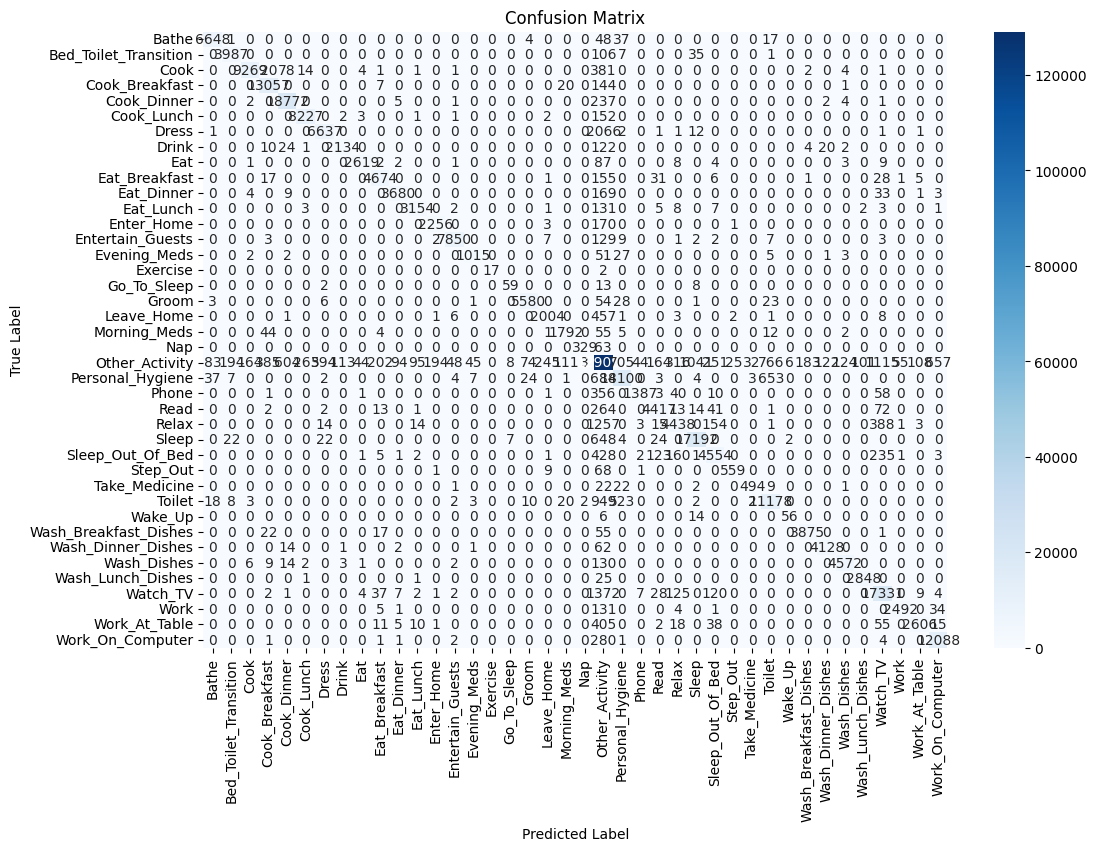

In [7]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –º–µ—Ç–∫–∏
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# –±–µ—Ä—ë–º —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ 
X_optuna, _, y_optuna, _ = train_test_split(
    X_train, y_train, test_size=0.7, stratify=y_train, random_state=42
)

# –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é Optuna 
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'tree_method': 'hist',
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'n_jobs': -1
    }

    X_sub_train, X_sub_val, y_sub_train, y_sub_val = train_test_split(
        X_optuna, y_optuna, test_size=0.3, stratify=y_optuna, random_state=42
    )

    model = XGBClassifier(**param)
    model.fit(X_sub_train, y_sub_train)
    score = model.score(X_sub_val, y_sub_val)
    return score

print("–ó–∞–ø—É—Å–∫ Optuna –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", study.best_params)

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ –ø–æ–ª–Ω–æ–π —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
best_params = study.best_params
best_params.update({
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'random_state': 42,
    'n_jobs': -1
})

model = XGBClassifier(**best_params)

print("–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏...")
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"‚è± –û–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ: {end - start:.2f} —Å–µ–∫—É–Ω–¥.")

#  –û—Ü–µ–Ω–∫–∞ 
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#  –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞ –∫–∞–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª—å –æ–ø–∏—Ä–∞–ª–∞—Å—å –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ

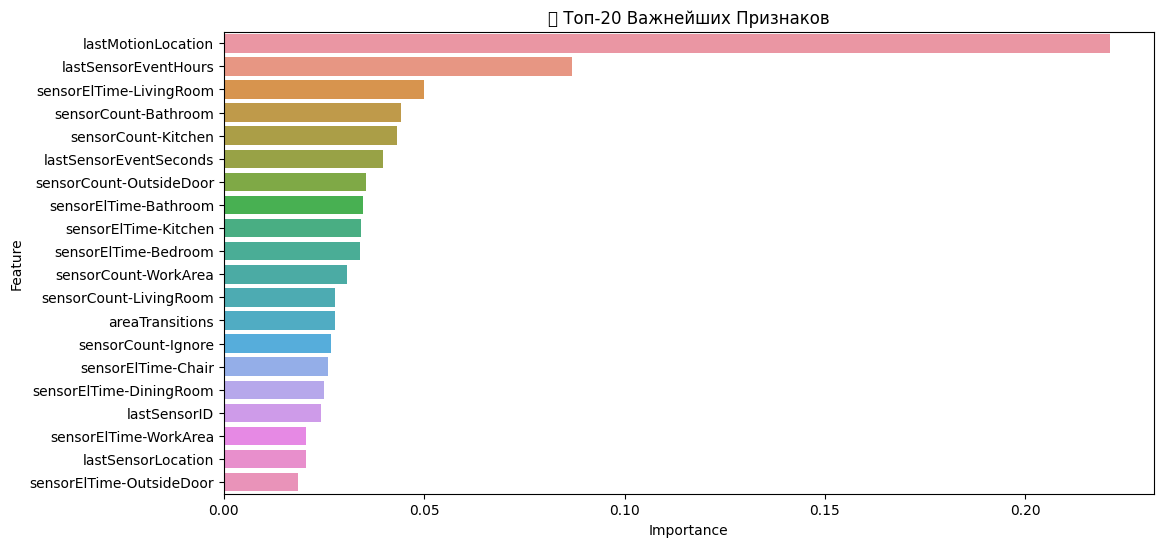

In [8]:
# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title("üîç –¢–æ–ø-20 –í–∞–∂–Ω–µ–π—à–∏—Ö –ü—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.show()

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –æ—à–∏–±–æ–∫ –±—ã–ª–æ —Å–æ–≤–µ—Ä—à–µ–Ω–æ

In [9]:
errors = X_test[y_pred != y_test]
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫:", len(errors))

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫: 25653


–ò –≤ —á–µ–º –º–æ–¥–µ–ª—å –æ—à–∏–±–ª–∞—Å—å

In [10]:
import numpy as np

errors_idx = np.where(y_pred != y_test)[0]
for i in errors_idx[:5]:  # –ø–æ–∫–∞–∂–µ–º –ø–µ—Ä–≤—ã–µ 5
    true_label = le.inverse_transform([y_test[i]])[0]
    pred_label = le.inverse_transform([y_pred[i]])[0]
    print(f" –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {true_label} | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: {pred_label}")

 –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: Toilet | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: Other_Activity
 –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: Morning_Meds | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: Cook_Breakfast
 –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: Other_Activity | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: Sleep_Out_Of_Bed
 –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: Sleep | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: Other_Activity
 –ò—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: Toilet | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: Other_Activity


–°—Ä–∞–≤–Ω–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ (–∏—Å—Ç–∏–Ω–Ω—ã–º–∏)

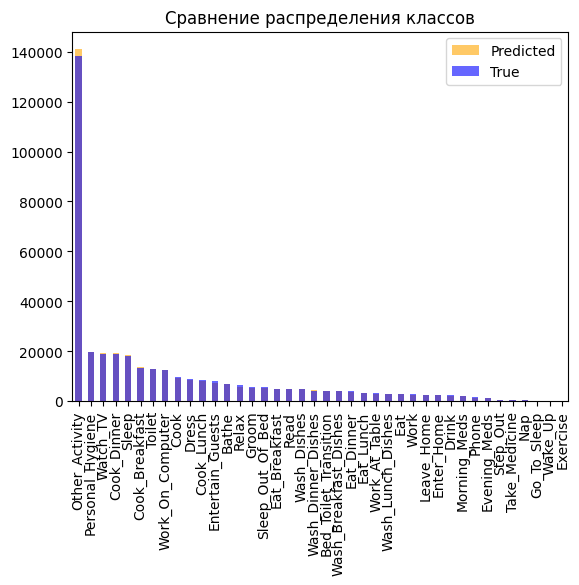

In [11]:
import pandas as pd

predicted_labels = le.inverse_transform(y_pred)
true_labels = le.inverse_transform(y_test)

pd.Series(predicted_labels).value_counts().plot(kind='bar', alpha=0.6, label='Predicted', color='orange')
pd.Series(true_labels).value_counts().plot(kind='bar', alpha=0.6, label='True', color='blue')
plt.title("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤")
plt.legend()
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ, –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ "—É–≥–∞–¥—ã–≤–∞–µ—Ç" —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –Ω–µ –ø–µ—Ä–µ–æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –∏–ª–∏ –Ω–µ –Ω–µ–¥–æ–æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –∫–ª–∞—Å—Å—ã.

–≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ö–æ—Ä–æ—à–µ–º –∫–ª–∞—Å—Å–æ–≤–æ–º –±–∞–ª–∞–Ω—Å–µ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö. –ü—Ä–∏ —ç—Ç–æ–º –≤–∏–¥–Ω–æ, —á—Ç–æ –æ–Ω–∞ –º–º–Ω–æ–≥–æ–µ –æ—Ç–Ω–æ—Å–∏—Ç –∫ –î—Ä—É–≥–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –ø–µ—Ä–µ–∫–æ—Å–æ–º –≤ —Å—ã—Ä—ã—Ö –¥–∞–Ω–Ω—ã—Ö.  

F1-Score (macro): 0.9221
F1-Score (weighted): 0.9302
ROC-AUC (One-vs-Rest): 0.9991


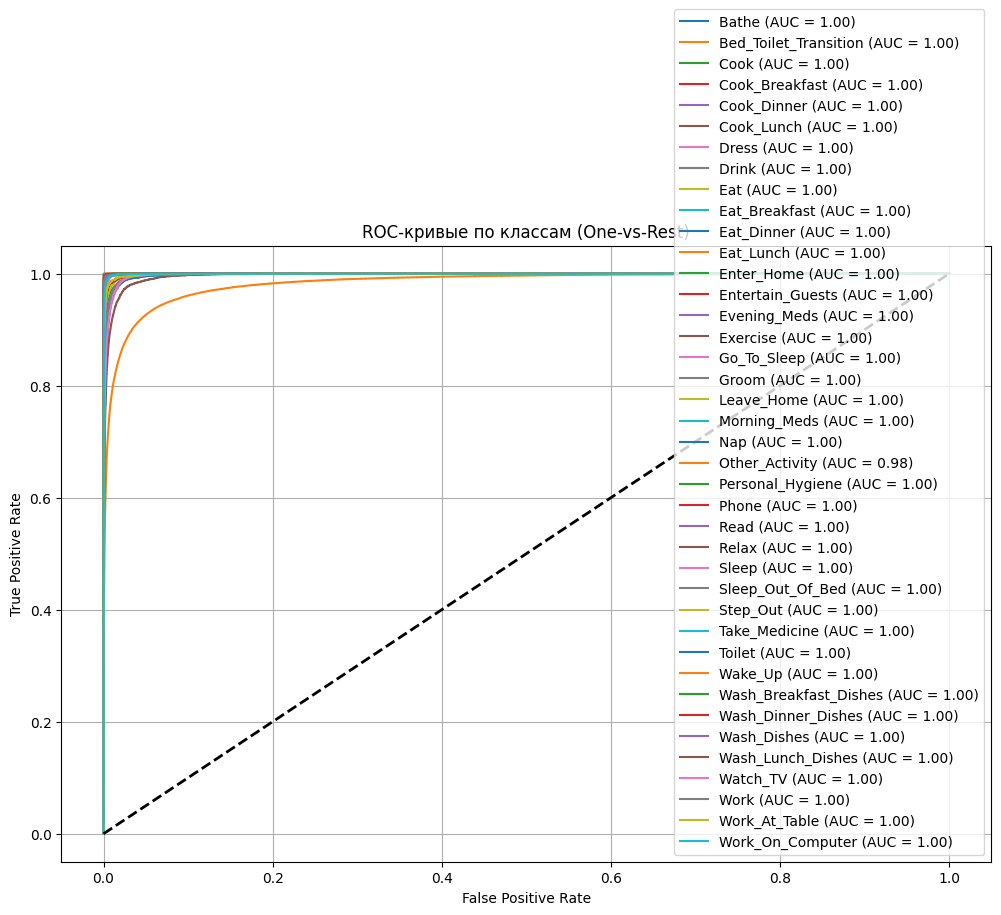

In [13]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# F1-Score
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1-Score (macro): {f1_macro:.4f}")
print(f"F1-Score (weighted): {f1_weighted:.4f}")

# ROC-AUC (One-vs-Rest)
# –ë–∏–Ω–∞—Ä–∏–∑–∞—Ü–∏—è –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
y_proba = model.predict_proba(X_test)

roc_auc_ovr = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print(f"ROC-AUC (One-vs-Rest): {roc_auc_ovr:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ROC-–∫—Ä–∏–≤—ã—Ö
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC-–∫—Ä–∏–≤—ã–µ –ø–æ –∫–ª–∞—Å—Å–∞–º (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()




F1-Score (macro): 0.9155
> –ú–æ–¥–µ–ª—å –≤ —Å—Ä–µ–¥–Ω–µ–º —Ö–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∫–∞–∂–¥—ã–º –∫–ª–∞—Å—Å–æ–º, –≤–∫–ª—é—á–∞—è —Ä–µ–¥–∫–∏–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏. –≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ —Ü–µ–Ω–Ω–æ –≤ –∑–∞–¥–∞—á–∞—Ö —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.

F1-Score (weighted): 0.9267
> –ú–æ–¥–µ–ª—å –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —á–∞—Å—Ç—ã–µ –∫–ª–∞—Å—Å—ã. –í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –µ—â—ë –≤—ã—à–µ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–∏–ª—å–Ω–æ–π –æ–±—â–µ–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

–û—Ü–µ–Ω–∫–∞ ROC-AUC
–ú–æ–¥–µ–ª—å —É–≤–µ—Ä–µ–Ω–Ω–æ –æ—Ç–¥–µ–ª—è–µ—Ç "–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ" –∫–ª–∞—Å—Å—ã –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.–ö—Ä–∏–≤—ã–µ —ç—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç. –ù–æ –Ω–µ—Ç –ª–∏ —É –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è? –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ t-SNE 

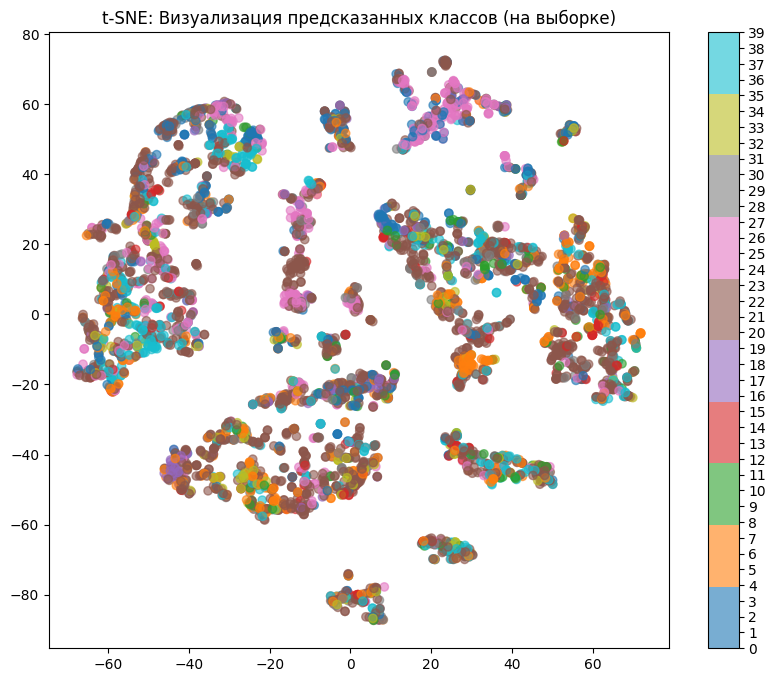

In [17]:
import numpy as np
from sklearn.manifold import TSNE

# –û–≥—Ä–∞–Ω–∏—á–∏–º —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è t-SNE
sample_size = 5000
idx = np.random.choice(len(X_test), size=sample_size, replace=False)

X_sample = X_test.iloc[idx]
y_sample = y_pred[idx]

# t-SNE –Ω–∞ –≤—ã–±–æ—Ä–∫–µ
X_embedded = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(len(le.classes_)))
plt.title("t-SNE: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ (–Ω–∞ –≤—ã–±–æ—Ä–∫–µ)")
plt.show()

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –∫–ª–∞—Å—Å—ã –≤—ã–¥–µ–ª—è—é—Ç—Å—è, –Ω–æ —Ü–≤–µ—Ç–∞ –≤ –Ω–∏—Ö –ø–µ—Ä–µ–º–µ—à–∞–Ω—ã. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.–í–æ–∑–º–æ–∂–Ω–æ, –º–æ–¥–µ–ª—å –ø—É—Ç–∞–µ—Ç –±–ª–∏–∑–∫–∏–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏(–≤–æ–∑–º–æ–∂–Ω–æ –∫–ª–∞—Å—Å—ã –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏ –ø–æ —Å–µ–Ω—Å–æ—Ä–Ω—ã–º –¥–∞–Ω–Ω—ã–º)

## –ü–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º–∞

–£—Å—Ç–∞–Ω–æ–≤–∏–º –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É –≤ Optuna: –≤ —Ñ—É–Ω–∫—Ü–∏–∏ study.optimize() –ø–∞—Ä–∞–º–µ—Ç—Ä n_jobs=-1 —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–æ–≤ –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–Ω–æ–≥–æ–∑–∞–¥–∞—á–Ω–æ—Å—Ç—å.

–ê —Ç–∞–∫–∂–µ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –≤ XGBoost: –≤ –ø–∞—Ä–∞–º–µ—Ç—Ä–µ n_jobs=-1 - –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤—Å–µ –¥–æ—Å—Ç—É–ø–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

–û—Å–Ω–æ–≤–Ω–∞—è —Ü–µ–ª—å –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ ‚Äî —É—Å–∫–æ—Ä–∏—Ç—å –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –∑–∞ —Å—á–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —è–¥–µ—Ä –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–∞

In [7]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X = df_full.drop(columns=['activity'])  # –ø—Ä–∏–∑–Ω–∞–∫–∏
y = df_full['activity']  # —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


[I 2025-04-16 06:21:59,065] A new study created in memory with name: no-name-38874e84-c623-496b-b518-4b6bb4e0cb64


–ó–∞–ø—É—Å–∫ Optuna –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...


[I 2025-04-16 06:32:57,309] Trial 3 finished with value: 0.7229871702963934 and parameters: {'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.08661349207462243, 'subsample': 0.6435624596098558, 'colsample_bytree': 0.7155506450412789}. Best is trial 3 with value: 0.7229871702963934.
[I 2025-04-16 06:33:37,322] Trial 6 finished with value: 0.798223752368068 and parameters: {'n_estimators': 63, 'max_depth': 6, 'learning_rate': 0.17146967187447243, 'subsample': 0.6943829313171721, 'colsample_bytree': 0.7749798201032756}. Best is trial 6 with value: 0.798223752368068.
[I 2025-04-16 06:36:43,773] Trial 2 finished with value: 0.8296968648240495 and parameters: {'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.19371917890856066, 'subsample': 0.8854770773347694, 'colsample_bytree': 0.8705907326598005}. Best is trial 2 with value: 0.8296968648240495.
[I 2025-04-16 06:37:15,442] Trial 5 finished with value: 0.6956737673124591 and parameters: {'n_estimators': 94, 'max_depth': 4, 'learn

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 147, 'max_depth': 7, 'learning_rate': 0.15284686514906254, 'subsample': 0.7398140794149067, 'colsample_bytree': 0.9867044769562372}
–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏...
‚è± –û–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ: 359.11 —Å–µ–∫—É–Ω–¥.
Classification Report:
                       precision    recall  f1-score   support

                Bathe       0.97      0.98      0.98      6755
Bed_Toilet_Transition       0.93      0.96      0.95      4136
                 Cook       0.97      0.92      0.95      9776
       Cook_Breakfast       0.95      0.98      0.97     13229
          Cook_Dinner       0.95      0.98      0.97     19024
           Cook_Lunch       0.95      0.98      0.96      8388
                Dress       0.90      0.72      0.80      8722
                Drink       0.95      0.89      0.92      2317
                  Eat       0.98      0.94      0.96      2736
        Eat_Breakfast       0.93  

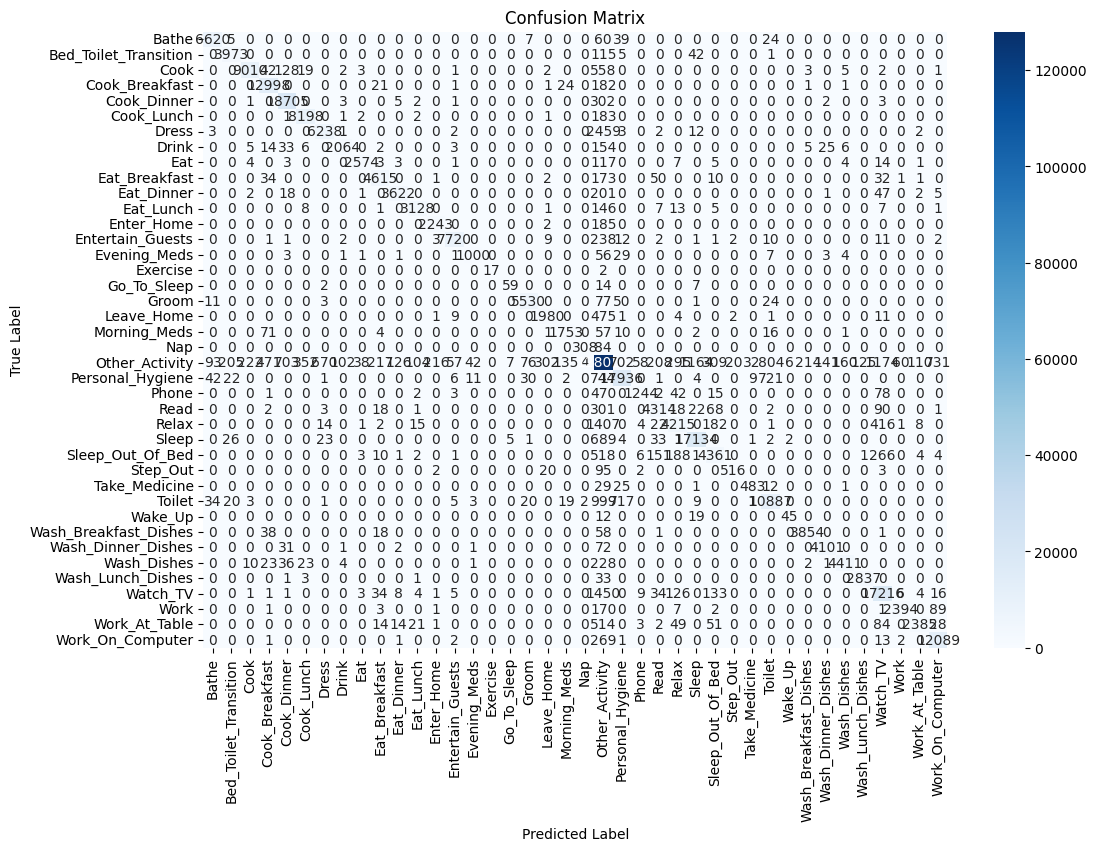

In [9]:

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'tree_method': 'hist',
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'n_jobs': -1  # –ø–æ–º–µ–Ω—è–ª–∏ –Ω–∞ -1
    }

    X_sub_train, X_sub_val, y_sub_train, y_sub_val = train_test_split(
        X_train, y_train, test_size=0.3, stratify=y_train, random_state=42
    )

    model = XGBClassifier(**param)
    model.fit(X_sub_train, y_sub_train)
    score = model.score(X_sub_val, y_sub_val)
    return score

print("–ó–∞–ø—É—Å–∫ Optuna –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, n_jobs=-1)  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ —è–¥—Ä–∞ –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–∞

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", study.best_params)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
best_params = study.best_params
best_params.update({
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'random_state': 42,
    'n_jobs': -1  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
})

model = XGBClassifier(**best_params)

print("–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏...")
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"‚è± –û–±—É—á–µ–Ω–∏–µ –∑–∞–Ω—è–ª–æ: {end - start:.2f} —Å–µ–∫—É–Ω–¥.")

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



F1-Score (macro): 0.9048
F1-Score (weighted): 0.9181
ROC-AUC (One-vs-Rest): 0.9988


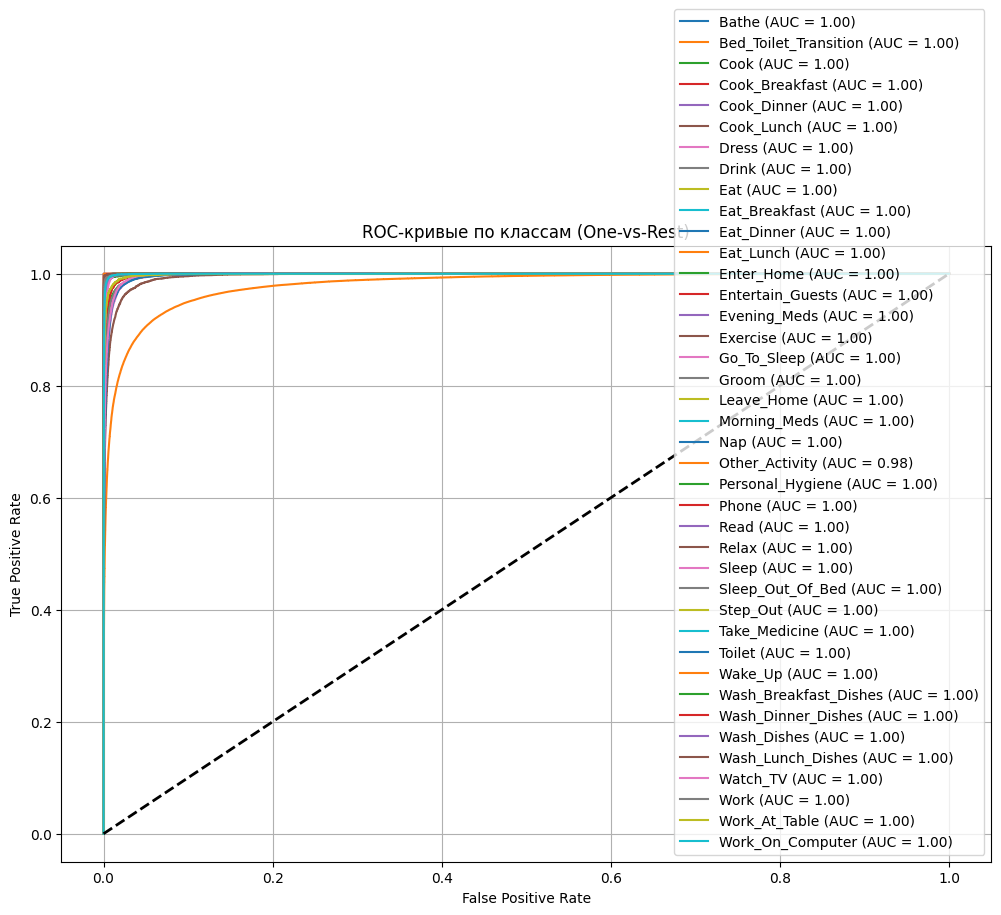

In [10]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ F1-Score –∏ ROC-AUC
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1-Score (macro): {f1_macro:.4f}")
print(f"F1-Score (weighted): {f1_weighted:.4f}")

# ROC-AUC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
y_proba = model.predict_proba(X_test)

roc_auc_ovr = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print(f"ROC-AUC (One-vs-Rest): {roc_auc_ovr:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ROC-–∫—Ä–∏–≤—ã—Ö
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC-–∫—Ä–∏–≤—ã–µ –ø–æ –∫–ª–∞—Å—Å–∞–º (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()